# Biosynthesis Pipeline Demo 2

#### Biosynthesis of propionic acid starting with PKS and 1 step of non-PKS modifications

Authors: Tyler Backman and Yash Chainani

In the previous demo, we were able to get feasible pathways to propionic acid using a combination of PKSs and non-PKSs for a non-PKS pathway comprising two reactions. Here, we will reduce the number of non-PKS enzymatic steps to 1 instead of 2 as we had before. It turns out that this will no longer lead to any pathways being discovered using the top PKS design returned by Retrotide. Thus, this demo will cover how `Biosynth Pipeline` 

In such an event, `Biosynth Pipeline` will now run through the next N number of top-scoring PKS designs to see if a complete pathway can be obtained. Here, N is defined by the user under the `max_designs` argument when the function `biosynth_pipeline.run_non_pks_synthesis_post_pks(max_designs = N)` is called.

If the next N PKS designs cannot be

### Import key dependencies

In [1]:
import json
import pandas as pd
from biosynth_pipeline import biosynth_pipeline
from retrotide import structureDB, designPKS
from rdkit import Chem

In [2]:
### initialize the feasibility classifier to plug into biosynth_pipeline object later
feasibility_model_path = '../models/updated_model_Apr28' # can pick the '.pkl' or '.dat' file too
calibration_model_path = '../models/updated_model_Apr28_calibration'
cofactors_path = '../data/coreactants_and_rules/all_cofactors_updated.csv'
fp_type = 'ecfp4'
nBits = 2048
max_species = 4
cofactor_positioning = 'by_descending_MW'

PX = biosynth_pipeline.feasibility_classifier(feasibility_model_path = feasibility_model_path,
                                                   calibration_model_path = calibration_model_path,
                                                   cofactors_path = cofactors_path,
                                                   fp_type = fp_type,
                                                   nBits = nBits,
                                                   max_species = max_species,
                                                   cofactor_positioning = cofactor_positioning)

### Combined propionic acid biosynthesis example via a 1 step non-PKS enzymatic reaction

In [3]:
# create an instance of the biosynth_pipeline class
pathway_sequence = ['pks', 'non_pks']  # run retrotide first then pickaxe
target_smiles = 'CCC(=O)O' # propionic acid

non_pks_steps = 1

biosynth_pipeline_object = biosynth_pipeline.biosynth_pipeline(pathway_sequence=pathway_sequence,
                                             target_smiles=target_smiles,
                                             feasibility_classifier = PX,
                                             non_pks_steps=non_pks_steps)

In [4]:
biosynth_pipeline_object.run_pks_synthesis(pks_release_mechanism='thiolysis')


Starting PKS retrobiosynthesis with retrotide
---------------------------------------------
computing module 1
   testing 1404 designs
   best score is 0.42857142857142855
computing module 2
   testing 1350 designs
   best score is 0.21052631578947367

Best PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

Closest final product is: CC(=O)CC(=O)O

Finished PKS synthesis - closest product to the target using the top PKS design of [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']] is CC(=O)CC(=O)O. Moving onto non-PKS synthesis...


Given that we weren't able to reach our downstream target product with PKSs only, we will now pass over the top PKS product to enzymatic reactions by running `biosynth_pipeline_object.run_non_pks_synthesis_post_pks(max_designs=N)`. The maximum number of designs specified can be toggled up or down. If no enzymatic pathways are found between the PKS product from the top-ranking PKS design and the final, target product, then the next N designs will be tried instead.

#### Examining PKS designs

We can print out the modules in the top PKS design:

In [5]:
repr(biosynth_pipeline_object.pks_designs[-1][0][0].modules)

'[["AT{\'substrate\': \'Methylmalonyl-CoA\'}", \'loading: True\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", \'loading: False\']]'

and the final product that is bound to the top PKS design:

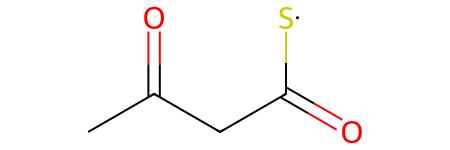

In [6]:
biosynth_pipeline_object.pks_designs[-1][0][0].computeProduct(structureDB)

we can run a termination reaction to get the unbound product:

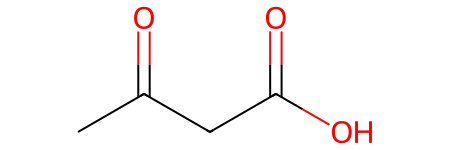

In [7]:
Chem.MolFromSmiles(biosynth_pipeline_object.run_pks_termination(pks_design_num=0, pks_release_mechanism = 'thiolysis'))

#### Run non-PKS tailorings

In [8]:
non_pks_pathways = biosynth_pipeline_object.run_non_pks_synthesis_post_pks(max_designs=5)


Starting pickaxe expansion on CC(=O)CC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:17] WARNING: not removing hydrogen atom without neighbors
[19:05:17] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 3.4074859619140625 s and contains:
		109 new compounds
		124 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways to target are found using non-PKS enzymes for 1 step/s and the top PKS module design

Attempting non-PKS enzymes for 1 step/s on PKS product from the next 5 best PKS designs. Note you can also try increasing the number of non-PKS enzymatic steps

------
PKS design 2: [["AT{'substrate': 'cemal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

PKS product from this PKS design is CC(=O)CC(=O)O with a similarity score of 0.42857142857142855 to the target molecule CCC(=O)O)

Starting pickaxe expansion on CC(=O)CC(=O)O

----------

[19:05:26] WARNING: not removing hydrogen atom without neighbors
[19:05:26] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 3.5105903148651123 s and contains:
		109 new compounds
		124 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CC(=O)CC(=O)O to CCC(=O)O

Moving onto product from next best PKS design

------
PKS design 3: [["AT{'substrate': 'Acetyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

PKS product from this PKS design is CC(=O)CC(=O)O with a similarity score of 0.42857142857142855 to the target molecule CCC(=O)O)

Starting pickaxe expansion on CC(=O)CC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:36] WARNING: not removing hydrogen atom without neighbors
[19:05:36] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 2.9392168521881104 s and contains:
		109 new compounds
		124 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CC(=O)CC(=O)O to CCC(=O)O

Moving onto product from next best PKS design

------
PKS design 4: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

PKS product from this PKS design is CCC(=O)CC(=O)O with a similarity score of 0.3157894736842105 to the target molecule CCC(=O)O)

Starting pickaxe expansion on CCC(=O)CC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:44] WARNING: not removing hydrogen atom without neighbors
[19:05:44] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 2.8623499870300293 s and contains:
		137 new compounds
		151 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCC(=O)CC(=O)O to CCC(=O)O

Moving onto product from next best PKS design

------
PKS design 5: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

PKS product from this PKS design is CCCC(=O)CC(=O)O with a similarity score of 0.24 to the target molecule CCC(=O)O)

Starting pickaxe expansion on CCCC(=O)CC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:51] WARNING: not removing hydrogen atom without neighbors
[19:05:51] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 2.893061876296997 s and contains:
		169 new compounds
		183 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCC(=O)CC(=O)O to CCC(=O)O

Moving onto product from next best PKS design

------
PKS design 6: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]

PKS product from this PKS design is COCC(=O)CC(=O)O with a similarity score of 0.24 to the target molecule CCC(=O)O)

Starting pickaxe expansion on COCC(=O)CC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:59] WARNING: not removing hydrogen atom without neighbors
[19:05:59] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 2.838616132736206 s and contains:
		132 new compounds
		144 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from COCC(=O)CC(=O)O to CCC(=O)O

Moving onto product from next best PKS design


Since none of the other PKS designs were able to synthesize our final product, we will work backwards from our target product and see if PKS designs can synthesize any of these upstream precursors instead

In [9]:
biosynth_pipeline_object.run_non_pks_synthesis_retro(pks_release_mechanism='thiolysis')


Starting a reverse pickaxe expansion on the final, downstream target CCC(=O)O

----------------------------------------
Intializing pickaxe object


[19:06:06] WARNING: not removing hydrogen atom without neighbors
[19:06:06] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 2.2343249320983887 s and contains:
		62 new compounds
		73 new reactions

Done expanding Generation: 1.
----------------------------------------


There are 62 precursors (located by enzymatic reactions upstream) of the final target molecule

----------------------------------------------------------

Running PKS retrosynthesis on CCC(=O)OC(=O)CC
computing module 1
   testing 1404 designs
   best score is 0.3728813559322034
computing module 2
   testing 1350 designs
   best score is 0.6363636363636364
computing module 3
   testing 1350 designs
   best score is 0.3787878787878788
The PKS product is CCC(=O)CC(=O)CC(=O)O

----------------------------------------------------------

Running PKS retrosynthesis on CCC(O)O
computing module 1
 

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)